### 1. K-Means Clustering

Pertama import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Kemudian import dataset yang digunakan, dan lakukan slicing terhadap  kolom 2 hingga 4 yang digunakan sebagai input features yang dibutuhkan

In [2]:
data = pd.read_csv('D:/Customer.csv')

In [3]:
X = data.iloc[:, [2, 4]].values

Buat list WCSS (mempersiapkan perhitungan WCSS), dan lakukan perintah looping. Kemudian running kmeans untuk mengolah data X yang sudah didefinisikan serta hitung wcss dengan perintah wcss.append (). Jika sudah, maka bisa divisualisasikan dengan menampilkan plot 

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


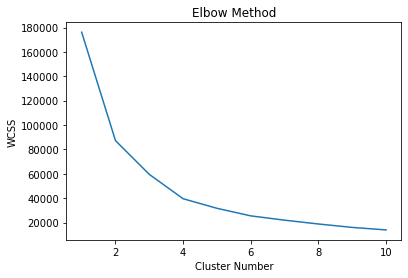

In [4]:
# Optimasi K-Means dengan metode elbow untuk menentukan jumlah klaster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

Plot-kan hasil visualisasi optimasi K-Means dengan metode elbow untuk menentukan jumlah klaster yang tepat. Pada Gambar tersebut dapat diamati bahwa garis grafik yang berbentuk siku terdapat pada klaster 2 dan 4, maka dapat disimpulkan pembagian klaster sebanyak 2 atau 4 adalah jumlah yang paling optimum.

Berdasar hasil visualisasi, dapat dilihat klaster yang optimum adalah 4. Maka langkah selanjutnya adalah melakukan prediksi seperti apa pengelompokkannya jika kita pilih K = 4.

In [5]:
# Proses K-Means Clustering
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X)
plt.show()

Langkah terakhir yaitu memvisualisasikan pembagian data set, jika K = 2 dan jika K = 4. Hasil dari pengelompokan tersebut dapat digunakan sebagai dukungan keputusan untuk menentukan strategi yang dituju oleh department store terhadap perilaku belanja dari pelanggannya

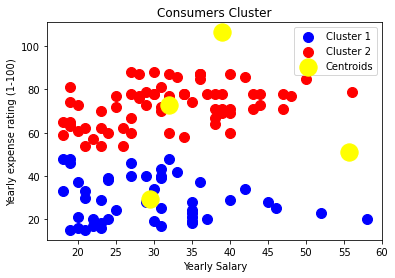

In [9]:
# Visualisasi hasil clusters 
# Jika K = 2
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', 
label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', 
label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 
300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()

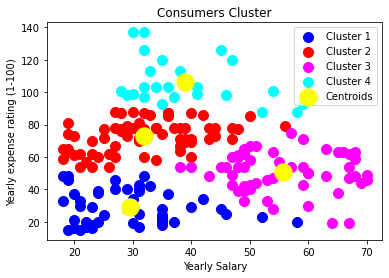

In [10]:
# Jika K = 4

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', 
label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', 
label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', 
label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', 
label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 
300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()

### 2. Hierachical Clustering

Pada Hiearachical Clustering, tahapan awalnya kurang lebih sama dengan sebelumnya. Yaitu meliputi, import library yang dibutuhkan dan seleksi fitur.

Langkah selanjutnya adalah import library scipy.cluster.hierarcy untuk membuat dendogram. Kemudian definisikan variabel dendrogam untuk membuat dendrogram. Paramater yang digunakan adalah linkage. Linkage adalah algoritma python yang ada di hierarchical clustering. 

Instruksikan untuk menampilkan grafik dengan setting warna berbeda. Setelah program dijalankan dan diketahui jumlah K yang tepat melalui dendogram diagram, langkah selanjutnya adalah melakukan pengolahan Hierachical Clustering sesuai dengan jumlah K yang telah diamati.

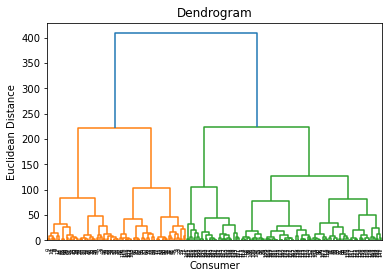

In [6]:
# Menggunakan dendrogram untuk menentukan angka cluster yang tepat
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()

Selanjutnya import library Agglomerative Clustering dari sklearn.cluster, dan definisikan variabel untuk membuat model Hierichal Clustering. Untuk parameter pengolahan Hierichal Clustering dipakai K = 2 sesuai hasil dendogram yang membagi dataset menjadi 2 klaster.

In [7]:
# Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', 
linkage = 'ward')
y_hc = hc.fit_predict(X)

Visualisasikan scatter plot hasil analisa kelompok perilaku belanja department store tersebut menggunakan metode Hierarchical Clustering

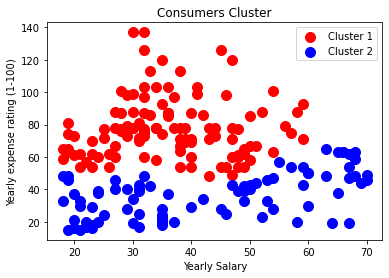

In [8]:
# Visualisasi hasil clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label 
= 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label 
= 'Cluster 2')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

Berdasarkan metode Hierichal Clustering, pembagian klaster yang paling sesuai adalah 2 klaster. Semua titik dapat tergabung pada cluster dengan baik dan hasil clustering hampir sama hasilnya dengan metode K-Means yang telah diuji coba sebelumnya yaitu 2 klaster. 

### DBSCAN

### Non-spherical Data

In [9]:
#Penerapan DBSCAN pada cluster nspherical data.
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

Generate 750 data (dapat disesuaikan dengan kebutuhan), kemudian di standardisasi

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
 random_state=0)
X = StandardScaler().fit_transform(X)

Definisikan fungsi untuk menghitung DBSCAN, kemudian visualisasi kan.

Estimated number of clusters: 3
Estimated number of noise points: 20
Homogeneity: 0.939
Completeness: 0.844
V-measure: 0.889
Adjusted Rand Index: 0.927
Adjusted Mutual Information: 0.888
Silhouette Coefficient: 0.605


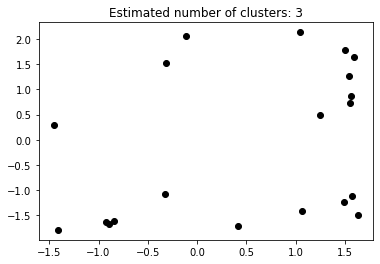

In [10]:
# Menghitung DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# jumlah cluster pada labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
 % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
 % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
 % metrics.silhouette_score(X, labels))

# Hasil Plot
import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
 for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
       # Black used for noise.
       col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]

plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=14)
xy = X[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
 markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Spherical Data

In [11]:
#Penerapan DBSCAN pada cluster spherical data.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

Number of clusters: 13
Homogeneity: 0.9999999999999997
Completeness: 0.3571301095210725
V-measure: 0.889
Adjusted Rand Index: 0.927
Adjusted Mutual Information: 0.888
Silhouette Coefficient: -0.034


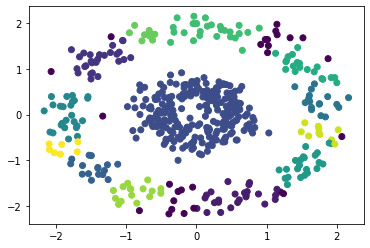

In [12]:
#mengenerate data set
X, y = make_circles(n_samples=500, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)

#mencetak hasil pengelompokan
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -
1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
 % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
 % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
 % metrics.silhouette_score(X, labels))

Dapat diamati pada gambar hasil clustering data non sperichal dan data spherical, bahwa hasil pengelompokan menggunakan metode DBSCAN dapat memisahkan data dengan baik pada kasus spherical dan nonspherical data. Hasil pengelompokan tersebut akan berbeda jika menggunakan metode K-Means dikarenakan K-Means memasukkan titik ke dalam clusternya berdasarkan tingkat kedekatannya bukan berdasarkan tingkat density-nya.